# K-means clustering by Giancarlo Franco Carrillo IRS
Matricula: A01638108
The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [47]:
# Import the packages that we will be using
import pandas as pd #for data handling
import seaborn as sns #for advanced ploting
import matplotlib.pyplot as plt #for showing plots

# Importing data

In [48]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
irisData = pd.read_csv(url, names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Flower'])
irisData

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [49]:
irisData.shape

(150, 5)

2. Drop rows with any missing values

In [50]:
#check for any missing value
print( irisData.isnull().sum() )
#we realize there's no missing value so we don't need to drop any missing value

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Flower         0
dtype: int64


3. Encoding the class label categorical column: from string to num


In [51]:
#Encoding categorical column to analyse the flower types
irisData = irisData.replace({"Flower": {"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3} })
irisData

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


## #1 Do clustering with the iris flower dataset to form clusters using as features petal width and length.

4. Discard columns that won't be used


In [52]:
# Select all rows for multiple columns, ["Petallength", "Petalwidth","Flowe"]
petalData = irisData.loc[:,["PetalLength", "PetalWidth", "Flower"]]
#get a first look to the data
petalData.describe()

,PetalLength,PetalWidth,Flower
count,150.000000,150.000000,150.000000
mean,3.758000,1.199333,2.000000
std,1.765298,0.762238,0.819232
min,1.000000,0.100000,1.000000
25%,1.600000,0.300000,1.000000
50%,4.350000,1.300000,2.000000
75%,5.100000,1.800000,3.000000
max,6.900000,2.500000,3.000000


5. Scatter plot of the data

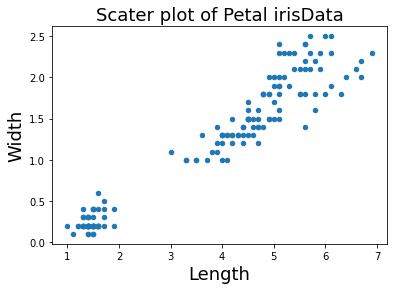

In [53]:
#once filtered the info, we can plot the data
plt.scatter(petalData.PetalLength,petalData.PetalWidth, s=20) #s=size of scatters
plt.title('Scater plot of Petal irisData',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

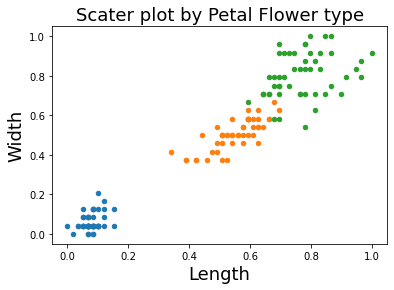

In [70]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = petalData[petalData.Flower==1]
df2 = petalData[petalData.Flower==2]
df3 = petalData[petalData.Flower==3]

plt.scatter(df1.PetalLength,df1.PetalWidth,s=20)
plt.scatter(df2.PetalLength,df2.PetalWidth,s=20)
plt.scatter(df3.PetalLength,df3.PetalWidth,s=20)

plt.title('Scater plot by Petal Flower type',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [55]:
#import machine learning library
from sklearn.cluster import KMeans

k = 3 #always define this k
#create object to do kmeans and distribute clusters
Km = KMeans(n_clusters=k)

#do kmeans
clusters = Km.fit_predict(petalData[['PetalLength','PetalWidth']]) #this is formula
#!note distance between points is always the same ecuation = sqrt(dx1^2 + dx2^2 + dx3^2 + ... dxn^2)

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
#insert one new column to compare clusters vs flower type
petalData['cluster1'] = clusters
petalData
#we realize that: flower 1 == cluster 0, flower 2 == cluster 2 and flower 3 == cluster 1 or likewhise

,PetalLength,PetalWidth,Flower,cluster1
0,1.4,0.2,1,1
1,1.4,0.2,1,1
2,1.3,0.2,1,1
3,1.5,0.2,1,1
4,1.4,0.2,1,1
...,...,...,...,...
145,5.2,2.3,3,0
146,5.0,1.9,3,0
147,5.2,2.0,3,0
148,5.4,2.3,3,0


In [57]:
Km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [58]:
petalData.cluster1.unique()

array([1, 2, 0])

In [73]:
Km.inertia_

31.371358974358966

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

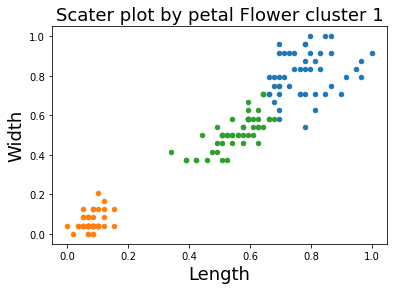

In [72]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = petalData[petalData.cluster1==0]
df2 = petalData[petalData.cluster1==1]
df3 = petalData[petalData.cluster1==2]

plt.scatter(df1.PetalLength,df1.PetalWidth,s=20)
plt.scatter(df2.PetalLength,df2.PetalWidth,s=20)
plt.scatter(df3.PetalLength,df3.PetalWidth,s=20)

plt.title('Scater plot by petal Flower cluster 1',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [61]:
#sum of squared distances
sse = []
#k ranges
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(petalData[['PetalLength','PetalWidth']])
    sse.append(km.inertia_)


C:\Users\Giancarlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

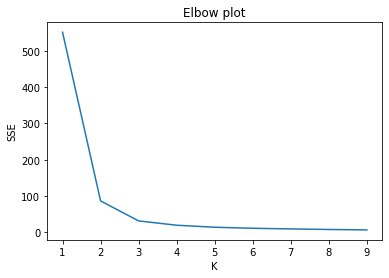

In [62]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')

plt.show

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
#create object
scaler = MinMaxScaler()

scaler.fit(petalData[['PetalLength']])
petalData['PetalLength'] = scaler.transform(petalData[['PetalLength']])

scaler.fit(petalData[['PetalWidth']])
petalData['PetalWidth'] = scaler.transform(petalData[['PetalWidth']])

petalData

,PetalLength,PetalWidth,Flower,cluster1
0,0.067797,0.041667,1,1
1,0.067797,0.041667,1,1
2,0.050847,0.041667,1,1
3,0.084746,0.041667,1,1
4,0.067797,0.041667,1,1
...,...,...,...,...
145,0.711864,0.916667,3,0
146,0.677966,0.750000,3,0
147,0.711864,0.791667,3,0
148,0.745763,0.916667,3,0


In [64]:
#get a new data visual
petalData.describe()

,PetalLength,PetalWidth,Flower,cluster1
count,150.000000,150.000000,150.000000,150.000000
mean,0.467458,0.458056,2.000000,1.026667
std,0.299203,0.317599,0.819232,0.818795
min,0.000000,0.000000,1.000000,0.000000
25%,0.101695,0.083333,1.000000,0.000000
50%,0.567797,0.500000,2.000000,1.000000
75%,0.694915,0.708333,3.000000,2.000000
max,1.000000,1.000000,3.000000,2.000000


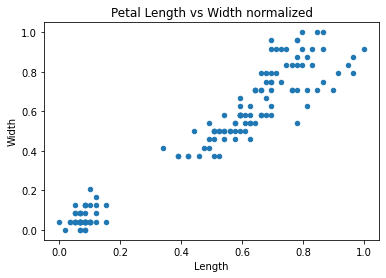

In [71]:
#show scatter plot with the normalized data
plt.scatter(petalData.PetalLength,petalData.PetalWidth,s=20)
plt.title('Petal Length vs Width normalized')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [66]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(petalData[['PetalLength','PetalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
# Add a new column to the dataset with the cluster information
petalData['cluster2'] = yp

petalData

,PetalLength,PetalWidth,Flower,cluster1,cluster2
0,0.067797,0.041667,1,1,1
1,0.067797,0.041667,1,1,1
2,0.050847,0.041667,1,1,1
3,0.084746,0.041667,1,1,1
4,0.067797,0.041667,1,1,1
...,...,...,...,...,...
145,0.711864,0.916667,3,0,0
146,0.677966,0.750000,3,0,0
147,0.711864,0.791667,3,0,0
148,0.745763,0.916667,3,0,0


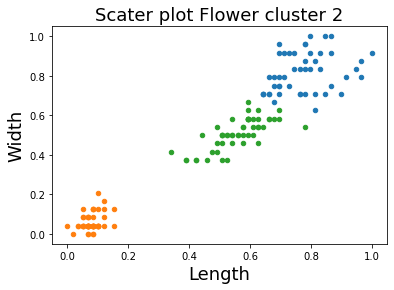

In [69]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡
df1 = petalData[petalData.cluster2==0]
df2 = petalData[petalData.cluster2==1]
df3 = petalData[petalData.cluster2==2]

plt.scatter(df1.PetalLength,df1.PetalWidth,s=20)
plt.scatter(df2.PetalLength,df2.PetalWidth,s=20)
plt.scatter(df3.PetalLength,df3.PetalWidth,s=20)

plt.title('Scater plot Flower cluster 2',fontsize=18)
plt.xlabel('Length',fontsize=18)
plt.ylabel('Width',fontsize=18)

plt.show()

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Conclutions: work with the iris dataset

1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.

   En un inicio al graficar los datos sin conocer a que grupos pertenecen, podemos darnos cuenta que existen dos conjuntos de datos cercanos por lo que podriamos decir que solo hay dos tipos, sin embargo, de antemano sabemos que son 3, al revelar los grupos, nos damos cuenta que si sigue un patron que el sistema podria intentar seguir.
   
   Mas delante al calcular la k, nos damos cuenta que el punto de inflexion donde la suma de los cuadrados de las distancias se vuelve despreciable es a partir de la 3ra iteracion, por lo que hace sentido con nuestra previa informacion de 3 tipos de flores, incluso me atreveria a decir que podriamos usar solo dos grupos ya que la tercer iteracion se acerca considerablemente a la segunda.
   
2. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot
    
    Para estos datos con las medidas de los petalos, realmente no vi una gran diferencia entre los datos normalizados y los crudos, esto creo que se debe a que desde que se grafican por primera vez, podriamos separarlos por grupos intuitivamente ya que obedecen mas a un patron que a una aleatoridad.
